 제주도 도로 교통량 예측 
====================
데이터 정보 
-------------
train.csv  
- 2022년 8월 이전 데이터만 존재 (단, 날짜가 모두 연속적이지 않음)  
- 4,701,217개의 데이터 (470만여건)  
- id : 샘플 별 고유 id  
- 날짜, 시간, 교통 및 도로구간 등 정보  
- target 변수 : 도로의 차량 평균 속도(km)  
  
train.csv 
- 2022년 8월 데이터만 존재 (단, 날짜가 모두 연속적이지 않음)  
- 291,241개의 데이터  
- id : 샘플 별 고유 id  
- 날짜, 시간, 교통 및 도로구간 등 정보  

         
데이터의 각 Column별 설명 
-------------
id : 아이디   
base_date : 날짜   
day_of_week : 요일  
base_hour : 시간대  
road_in_use : 도로사용여부  
lane_count : 차로수  
road_rating : 도로등급  
multi_linked : 중용구간 여부  
connect_code : 연결로 코드  
maximum_speed_limit : 최고속도제한  
weight_restricted : 통과제한하중  
height_restricted : 통과제한높이  
road_type : 도로유형  
start_latitude : 시작지점의 위도  
start_longitude : 시작지점의 경도  
start_turn_restricted : 시작 지점의 회전제한 유무  
end_latitude : 도착지점의 위도  
end_longitude : 도착지점의 경도  
end_turn_restricted : 도작지점의 회전제한 유무  
road_name : 도로명  
start_node_name : 시작지점명  
end_node_name : 도착지점명  
vehicle_restricted : 통과제한차량  
target : 평균속도(km)  


In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from matplotlib import rc #맥 한글깨짐
rc('font', family='AppleGothic')#맥 한글깨짐

In [2]:
df_train=pd.read_csv("/Users/yeseulseo/Side_Project/DACON/Jeju_traffic/data/train.csv")
df_test=pd.read_csv("/Users/yeseulseo/Side_Project/DACON/Jeju_traffic/data/test.csv")

In [72]:
df_train.head(10)

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
5,TRAIN_0000005,20210913,월,7,2,107,경찰로,0,0,60.0,...,0,시청입구2,33.249949,126.505664,없음,서호2차현대맨션203동,33.252183,126.506069,없음,28.0
6,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
7,TRAIN_0000007,20211213,월,16,2,107,외도천교,0,0,60.0,...,3,외도천교,33.482392,126.441622,없음,외도천교,33.482332,126.442266,없음,28.0
8,TRAIN_0000008,20211004,월,15,2,107,경찰로,0,0,60.0,...,0,신성교회,33.253074,126.506393,없음,서호2차현대맨션203동,33.252183,126.506069,없음,14.0
9,TRAIN_0000009,20211208,수,2,1,103,일반국도16호선,0,0,50.0,...,0,양수장,33.361717,126.766958,없음,제2가시교,33.364336,126.769409,없음,52.0


In [4]:
df_train.shape

(4701217, 23)

### 데이터 확인 

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

### 결측치 확인
- 결측값 없음 

In [6]:
df_train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

### 고유값 확인 
- vehicle_restricted , height_restricted 컬럼은 한가지 값만 존재하므로 삭제
- 날짜데이터를 년,월,일로 컬럼 추가 

In [8]:
df_train.nunique()

id                       4701217
base_date                    281
day_of_week                    7
base_hour                     24
lane_count                     3
road_rating                    3
road_name                     61
multi_linked                   2
connect_code                   2
maximum_speed_limit            6
vehicle_restricted             1
weight_restricted              4
height_restricted              1
road_type                      2
start_node_name              487
start_latitude               586
start_longitude              586
start_turn_restricted          2
end_node_name                487
end_latitude                 586
end_longitude                586
end_turn_restricted            2
target                       102
dtype: int64

In [19]:
df_test.nunique()

id                       291241
base_date                    31
day_of_week                   7
base_hour                    24
lane_count                    3
road_rating                   3
road_name                    46
multi_linked                  1
connect_code                  1
maximum_speed_limit           5
vehicle_restricted            1
weight_restricted             4
height_restricted             1
road_type                     2
start_node_name             250
start_latitude              294
start_longitude             294
start_turn_restricted         2
end_node_name               252
end_latitude                296
end_longitude               296
end_turn_restricted           2
dtype: int64

In [3]:
#해당 컬럼 삭제
df_train.drop(['vehicle_restricted',"height_restricted"],axis=1,inplace=True)
df_test.drop(["vehicle_restricted", "height_restricted"], axis = 1, inplace = True)

In [4]:
#년,월,일 컬럼 추가 
df_train_day = df_train.copy()
df_train_day["base_date"]= pd.to_datetime(df_train["base_date"],format='%Y%m%d')
df_train_day['year']= df_train_day['base_date'].dt.year
df_train_day['month']= df_train_day['base_date'].dt.month
df_train_day['day']= df_train_day['base_date'].dt.day
df_train_day.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,...,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,...,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,...,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,...,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,...,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5


### 상관관계 분석
- maximum_speed_limit ,weight_restricted column이 상관관계가 높은것으로 나타남.
- lane_coun(차로 수)가 많을수록 속도가 더 높을 것으로 예측했지만 target과의 음의 관계로 차로수가 높을수록 속도가 더 높다는것을 알 수 있다. 
- road_rating, road_type가 상관계수가 높은걸 봐서 도로의 유형과 형태가 속도에 영향을 줄 것으로 추측


In [25]:
#object데이터는 상관관계 게산을 위해 encoder
items = ['day_of_week','road_name','start_node_name','start_turn_restricted','end_node_name',"end_turn_restricted"]
df_corr = df_train_day.copy()
endcoder =LabelEncoder()

for i in items : 
    encoder = LabelEncoder()
    encoder.fit(df_corr[i])
    df_corr[i] = encoder.transform(df_corr[i])


df_corr.drop(['id'],axis=1,inplace=True) #id컬럼은 빼고 진행 
df_corr

,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
0,2022-06-23,1,17,1,106,46,0,0,60.0,32400.0,...,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23
1,2022-07-28,1,21,2,103,34,0,0,60.0,0.0,...,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28
2,2021-10-10,4,7,2,103,36,0,0,80.0,0.0,...,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10
3,2022-03-11,0,13,2,107,57,0,0,50.0,0.0,...,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11
4,2021-10-05,6,8,2,103,35,0,0,80.0,0.0,...,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,2021-11-04,1,16,1,107,0,0,0,50.0,0.0,...,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4
4701213,2022-03-31,1,2,2,107,0,0,0,80.0,43200.0,...,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31
4701214,2022-06-13,3,22,2,103,35,0,0,60.0,0.0,...,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13
4701215,2021-10-20,2,2,2,103,37,0,0,80.0,0.0,...,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20


/Users/yeseulseo/miniforge3/envs/jeju/lib/python3.8/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/yeseulseo/miniforge3/envs/jeju/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


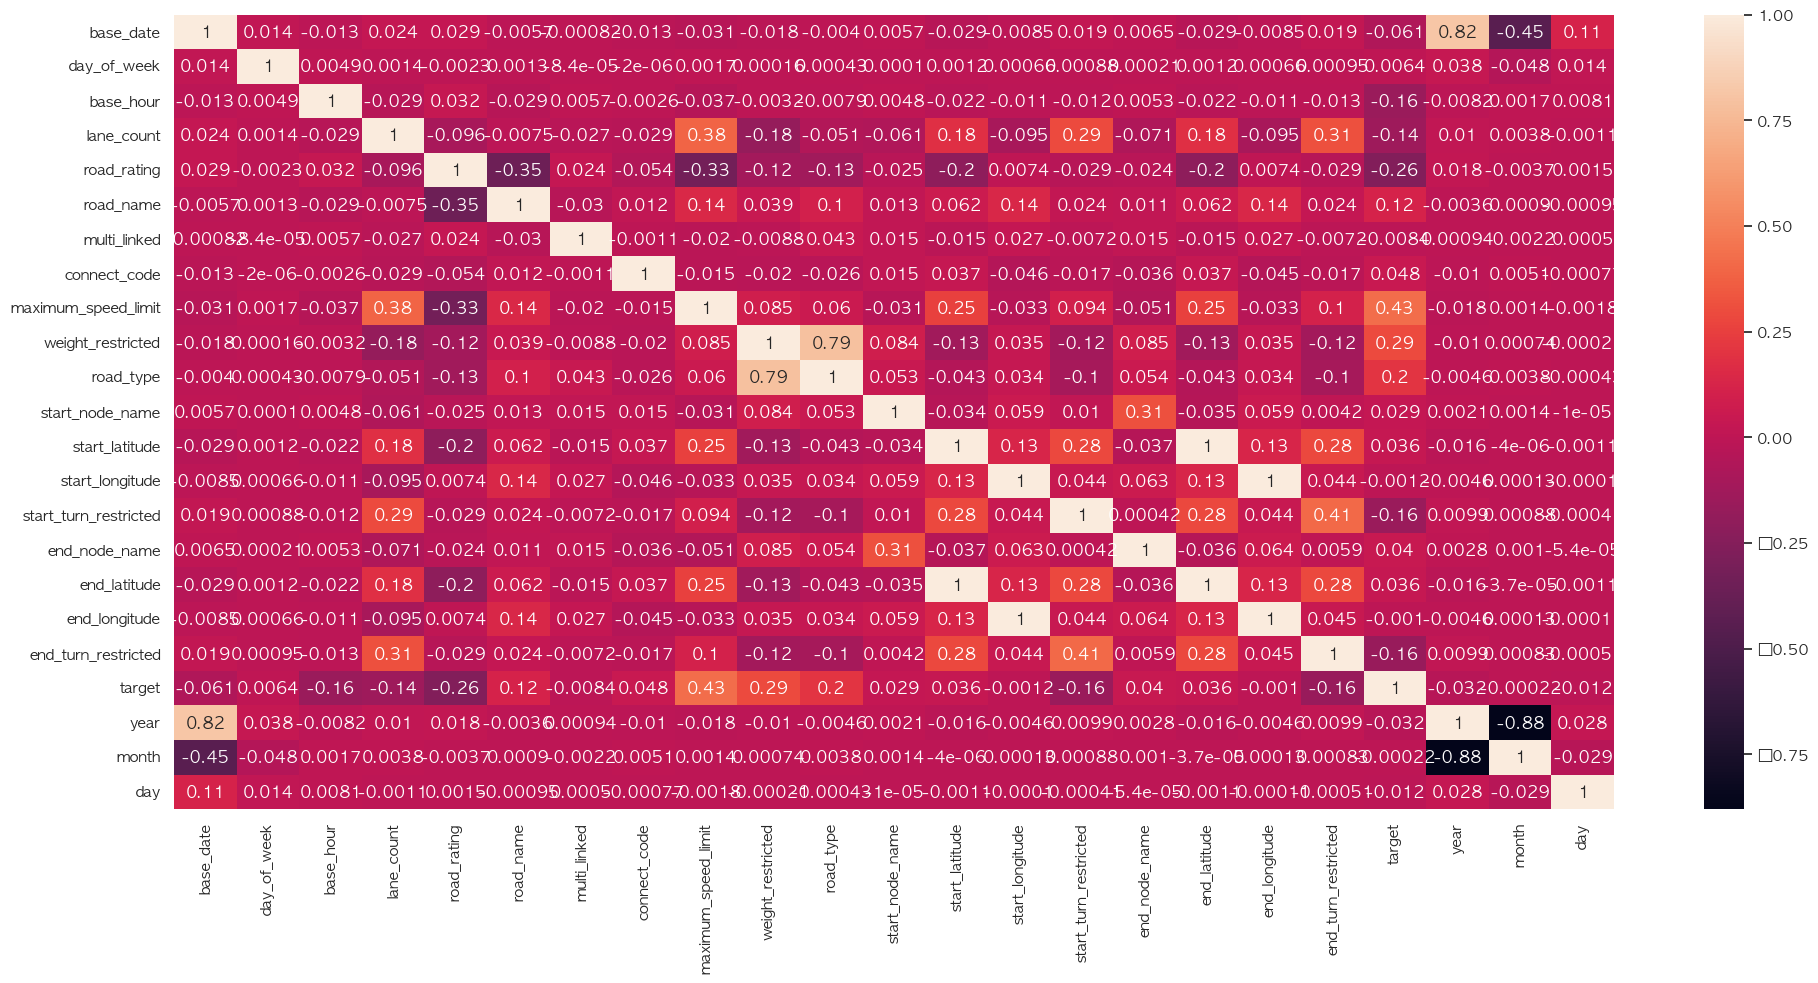

In [29]:

plt.figure(figsize=(20,10))
sns.heatmap(df_corr.corr(),annot=True)
         
plt.tight_layout()
plt.show()


In [33]:
df_corr.corr()

,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
base_date,1.000000,0.014203,-0.012512,0.023900,0.028571,-0.005739,-0.000815,-0.013239,-0.031317,-0.018471,...,-0.008513,0.019465,0.006450,-0.029415,-0.008541,0.019369,-0.060606,0.816130,-0.446131,0.111779
day_of_week,0.014203,1.000000,0.004889,0.001426,-0.002274,0.001307,-0.000084,-0.000002,0.001651,0.000158,...,0.000656,0.000879,0.000212,0.001214,0.000664,0.000949,0.006397,0.037503,-0.047578,0.013611
base_hour,-0.012512,0.004889,1.000000,-0.029194,0.031658,-0.029342,0.005711,-0.002649,-0.036756,-0.003231,...,-0.011478,-0.012476,0.005336,-0.021597,-0.011489,-0.012589,-0.159407,-0.008213,0.001738,0.008077
lane_count,0.023900,0.001426,-0.029194,1.000000,-0.095717,-0.007497,-0.026555,-0.029290,0.384002,-0.177224,...,-0.094806,0.292852,-0.071247,0.182330,-0.094732,0.312854,-0.144256,0.010402,0.003799,-0.001085
road_rating,0.028571,-0.002274,0.031658,-0.095717,1.000000,-0.353247,0.024218,-0.054160,-0.327474,-0.118630,...,0.007401,-0.029050,-0.023999,-0.204843,0.007386,-0.029451,-0.261693,0.017585,-0.003700,0.001480
road_name,-0.005739,0.001307,-0.029342,-0.007497,-0.353247,1.000000,-0.030449,0.012323,0.143490,0.039103,...,0.136092,0.023554,0.010939,0.061585,0.136035,0.023933,0.116778,-0.003605,0.000905,-0.000947
multi_linked,-0.000815,-0.000084,0.005711,-0.026555,0.024218,-0.030449,1.000000,-0.001111,-0.020245,-0.008790,...,0.026895,-0.007202,0.014908,-0.014907,0.026896,-0.007203,-0.008408,0.000945,-0.002193,0.000496
connect_code,-0.013239,-0.000002,-0.002649,-0.029290,-0.054160,0.012323,-0.001111,1.000000,-0.015190,-0.020491,...,-0.045695,-0.016789,-0.035967,0.037163,-0.044853,-0.016791,0.048348,-0.010311,0.005092,-0.000767
maximum_speed_limit,-0.031317,0.001651,-0.036756,0.384002,-0.327474,0.143490,-0.020245,-0.015190,1.000000,0.085080,...,-0.033018,0.094124,-0.051493,0.252958,-0.032907,0.104737,0.425715,-0.017561,0.001396,-0.001759
weight_restricted,-0.018471,0.000158,-0.003231,-0.177224,-0.118630,0.039103,-0.008790,-0.020491,0.085080,1.000000,...,0.034926,-0.119699,0.085132,-0.128305,0.034915,-0.119564,0.294092,-0.010346,0.000740,-0.000207


### 데이터 날짜 확인 

- train 데이터 21.09.01부터 22.07.31까지 존재 (8월 데이터는 존재하지 않음 )
- test 데이터 22년 8월 데이터 

In [34]:
df_train_day['base_date'].value_counts().sort_index()

base_date
2021-09-01    19722
2021-09-02    18809
2021-09-03    19880
2021-09-04    17998
2021-09-05    17836
              ...  
2022-07-27     9195
2022-07-28     7601
2022-07-29     5138
2022-07-30     1845
2022-07-31     5539
Name: count, Length: 281, dtype: int64

In [35]:
df_test['base_date'].value_counts().sort_index()

base_date
20220801    8679
20220802    9013
20220803    8805
20220804    9101
20220805    9095
20220806    9274
20220807    9179
20220808    9619
20220809    9663
20220810    9691
20220811    9634
20220812    9657
20220813    9226
20220814    9228
20220815    9279
20220816    9608
20220817    9613
20220818    9610
20220819    9640
20220820    9643
20220821    9610
20220822    9220
20220823    9592
20220824    9237
20220825    9638
20220826    9637
20220827    9137
20220828    9101
20220829    9608
20220830    9576
20220831    9628
Name: count, dtype: int64

In [44]:
#그룹에 따라 평균 속도 함수
def groupby_target (a):
    df_groupby = df_train_day[[a,'target']]
    df_groupby = df_groupby.groupby(a).mean().reset_index()
   
    return df_groupby

### 최고 제한 속도(maximum_speed_limit)

- 제한 속도에 따라 평균 속도 차이가 있음
- 제한 속도 40인데 평균 속도가 가장 높음 
- 제한 속도가 60이 가장 많음 
- 이상치 존재 

In [36]:
df_train['maximum_speed_limit'].value_counts()

maximum_speed_limit
60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: count, dtype: int64

/var/folders/yp/r9q2z09j2rj4vfhr9q8r9vl40000gn/T/ipykernel_1642/729383089.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.maximum_speed_limit)


<Axes: xlabel='maximum_speed_limit', ylabel='Density'>

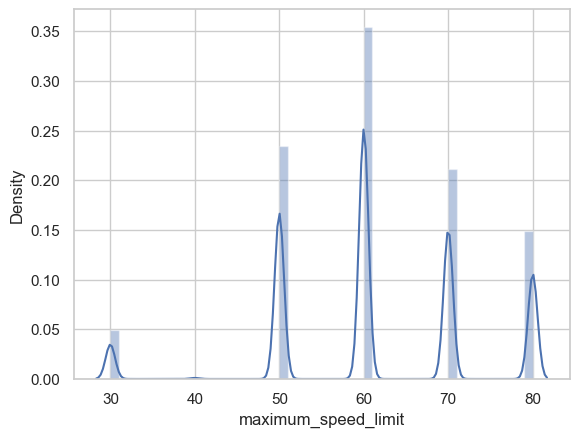

In [43]:
sns.distplot(df_train.maximum_speed_limit)

In [47]:
df_groupby_maximum=groupby_target ('maximum_speed_limit')
df_groupby_maximum

,maximum_speed_limit,target
0,30.0,32.220825
1,40.0,62.774080
2,50.0,35.492231
3,60.0,42.316287
4,70.0,41.366208
5,80.0,60.703696


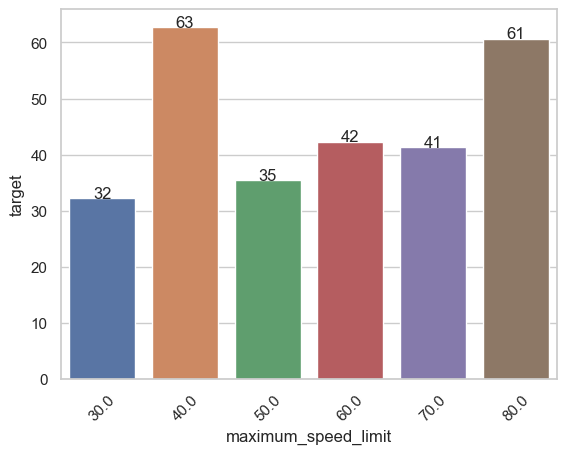

In [51]:
plt.xticks(rotation=45)


ax=sns.barplot(x='maximum_speed_limit',y='target',data=df_groupby_maximum)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.0f}", # 값
            ha='center') # 가운데 정렬
plt.show()


<Axes: xlabel='maximum_speed_limit', ylabel='target'>

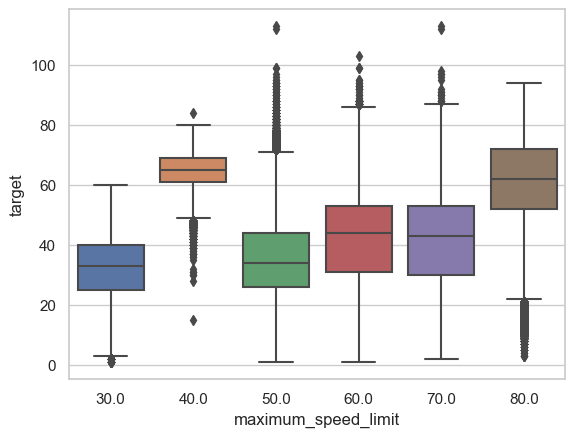

In [38]:
#이상치
sns.boxplot(x = "maximum_speed_limit", y = "target", data = df_train)

In [9]:
df_train['day_of_week'].value_counts()

day_of_week
금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: count, dtype: int64

In [10]:
df_test['day_of_week'].value_counts()

day_of_week
화    47452
수    46974
월    46405
금    38029
목    37983
토    37280
일    37118
Name: count, dtype: int64

데이터 2021.09.01부터 2022.07.31까지 자료

In [17]:
df_train['base_hour'].value_counts().sort_index()

base_hour
0     154158
1     182353
2     169322
3     155938
4     165284
5     181128
6     189418
7     199061
8     201875
9     205327
10    206316
11    208515
12    211833
13    214297
14    214182
15    214541
16    208420
17    208377
18    207500
19    209870
20    205059
21    203585
22    200629
23    184229
Name: count, dtype: int64

In [11]:
df_train['road_type'].value_counts()


road_type
0    3737117
3     964100
Name: count, dtype: int64

In [12]:
df_train['road_rating'].value_counts()


road_rating
103    2159511
107    1582214
106     959492
Name: count, dtype: int64

In [13]:
df_train['maximum_speed_limit'].value_counts()


maximum_speed_limit
60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: count, dtype: int64

## 이상치 확인 

/Users/yeseulseo/miniforge3/envs/jeju/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/yeseulseo/miniforge3/envs/jeju/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


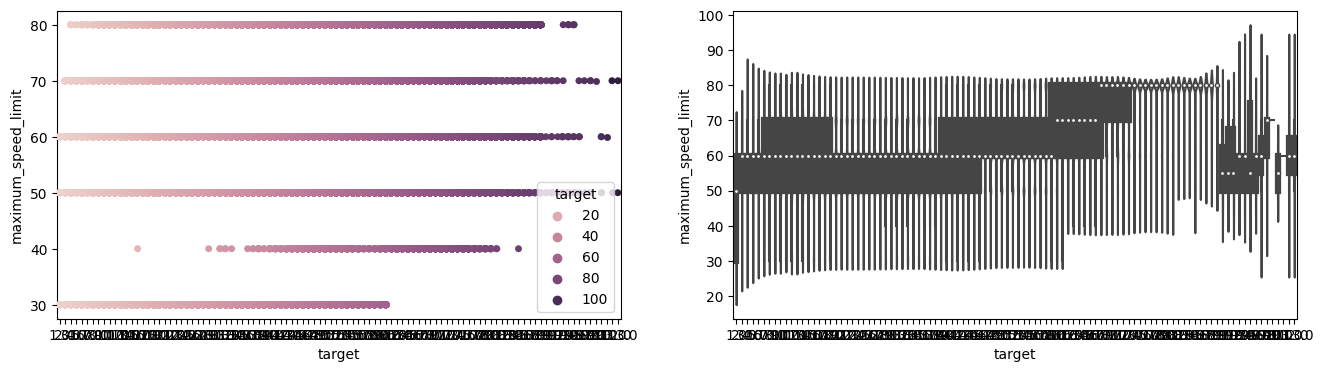

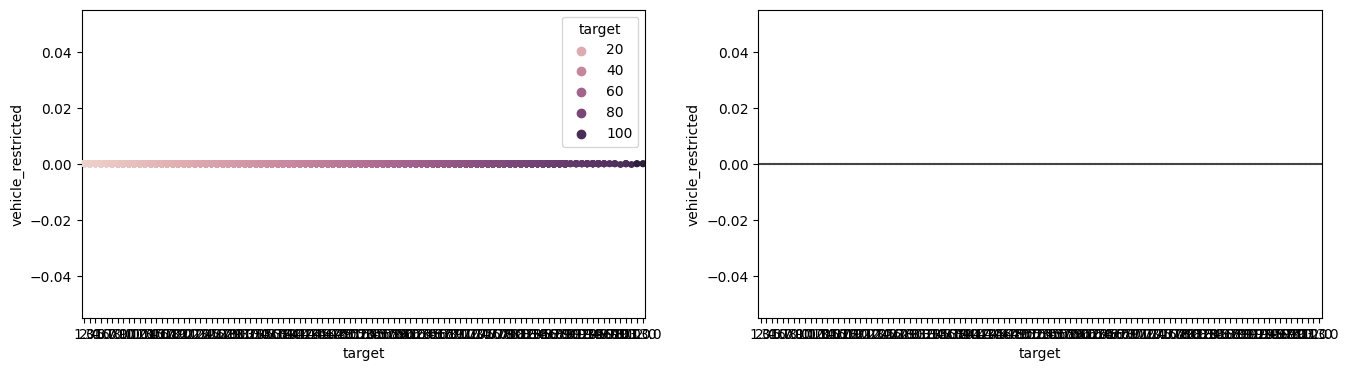

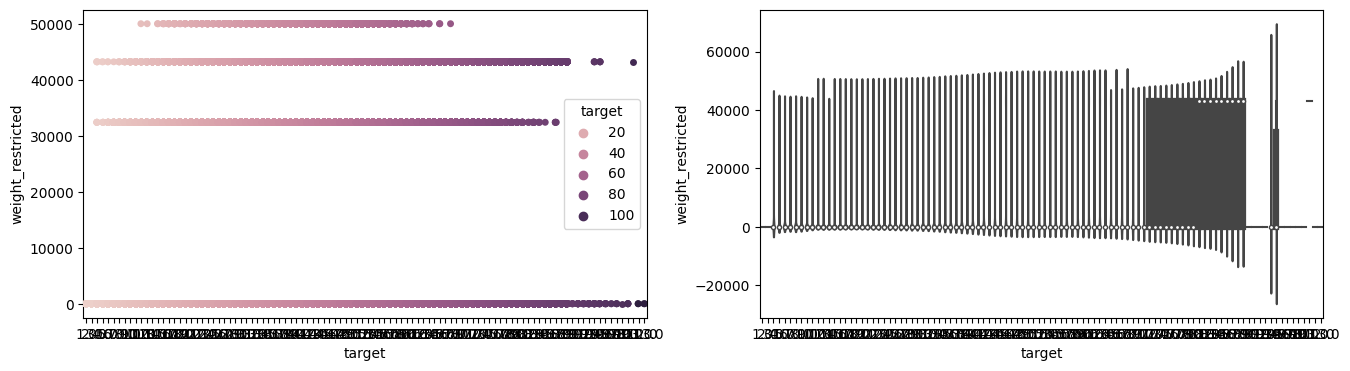

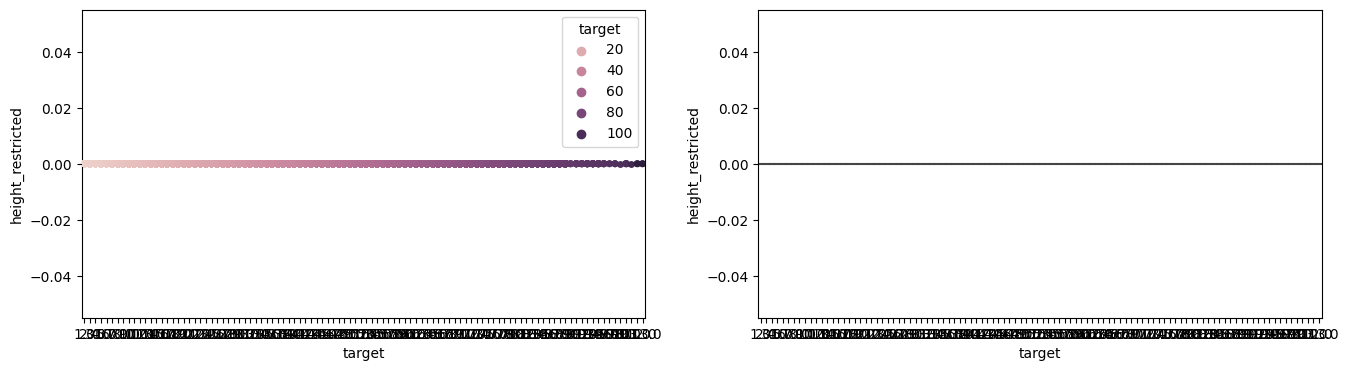

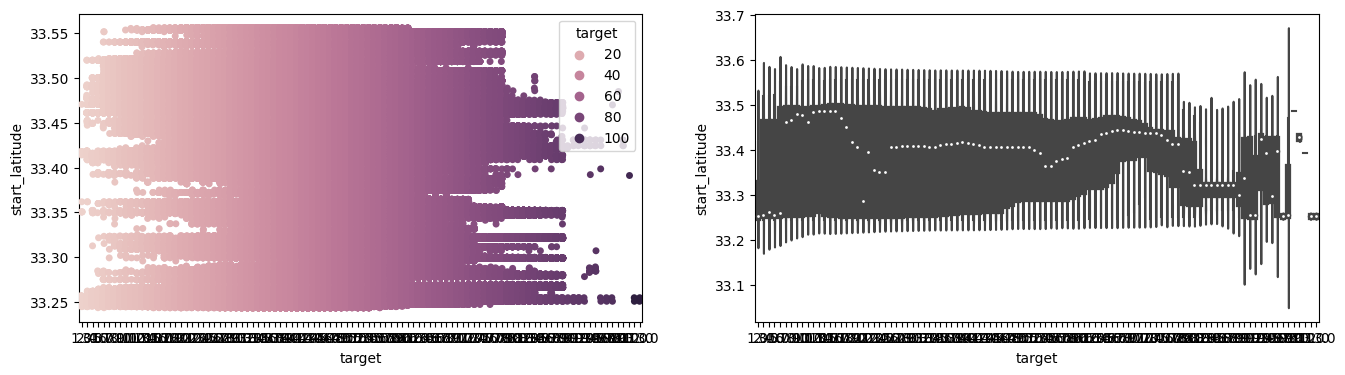

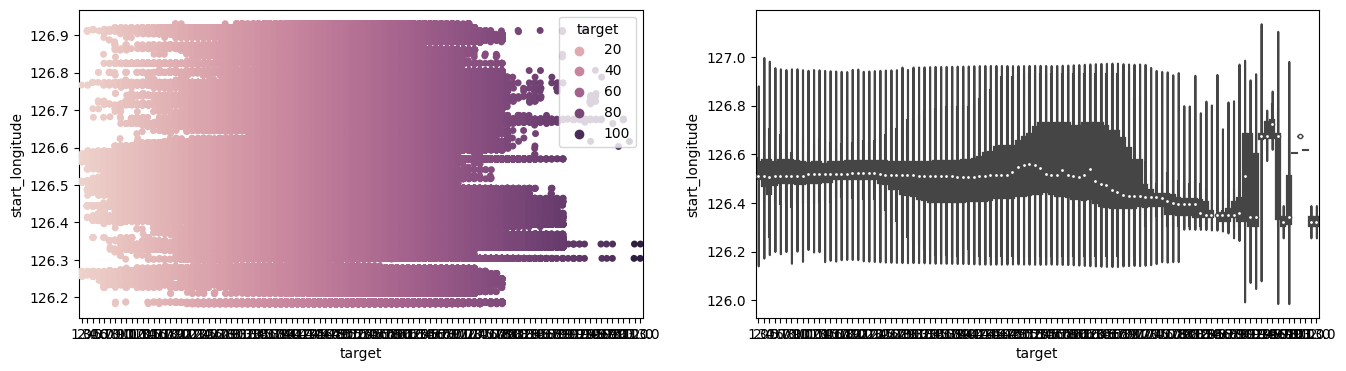

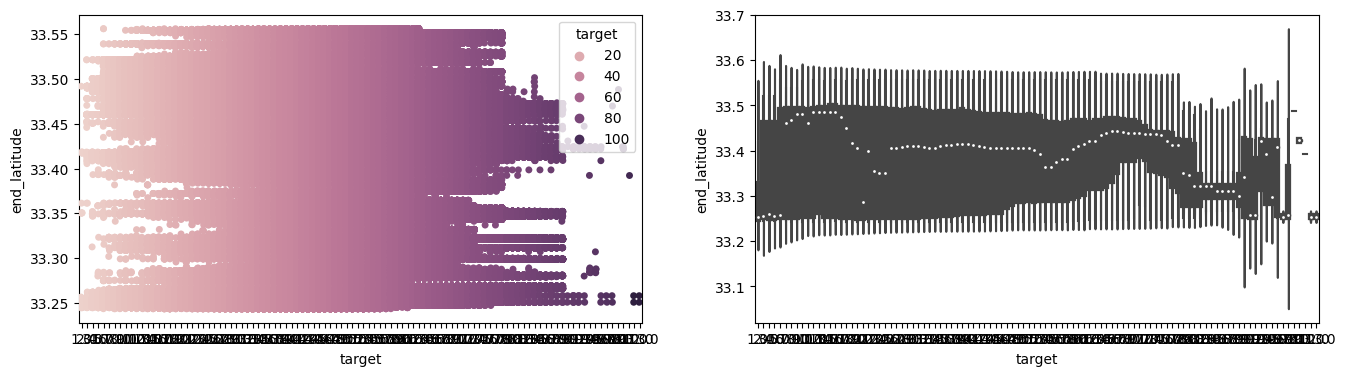

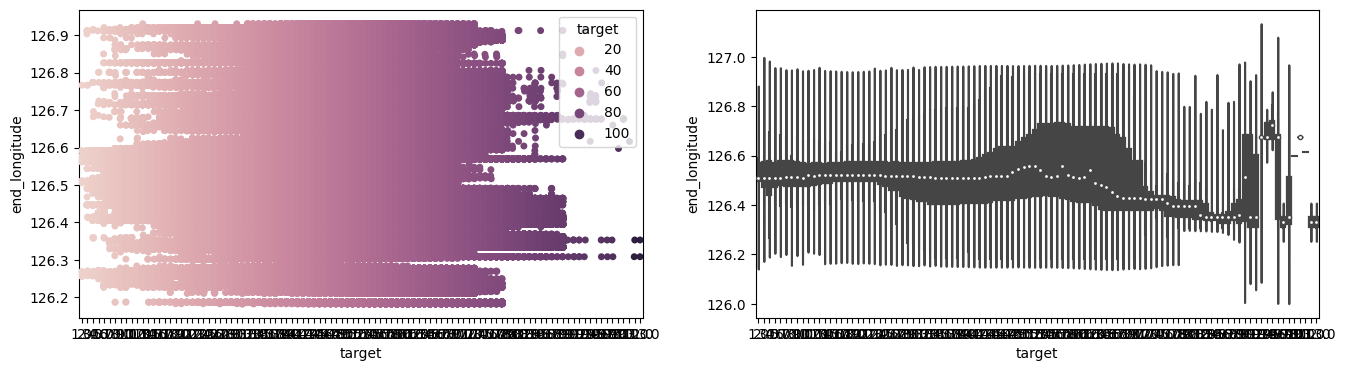

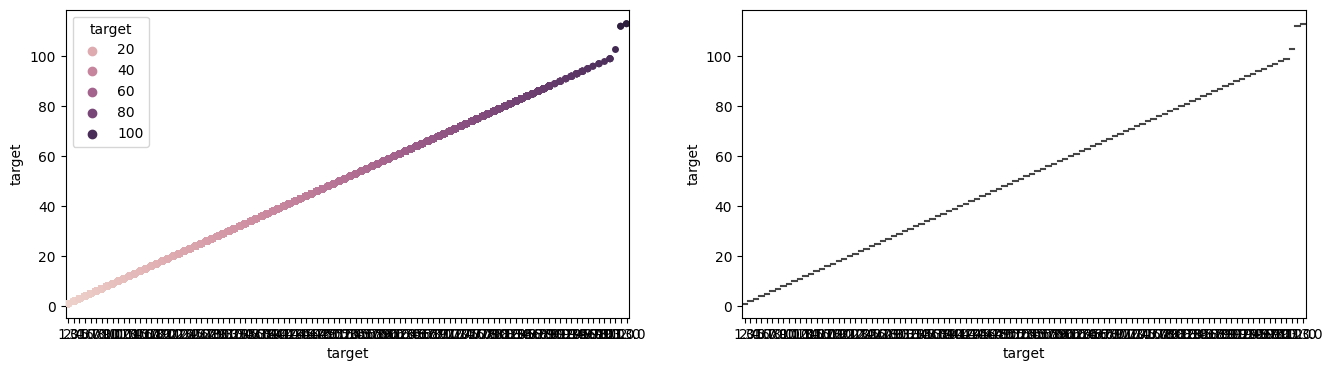

In [16]:
numerical_columns =df_train.select_dtypes(exclude=['object','int']).columns.tolist()

def show_dist_plot(df,t, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize=(16,4))
        sns.stripplot(x=df[t],y=df[column], ax=ax[0],hue=df[t])
        sns.violinplot(data=df, x=t, y=column, ax=ax[1])
        
show_dist_plot(df_train,'target', numerical_columns)

추이

In [3]:
df_train_day = df_train.copy()
df_train_day["base_date"]= pd.to_datetime(df_train["base_date"],format='%Y%m%d')
df_train_day.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [4]:
df_train_day['year']= df_train_day['base_date'].dt.year
df_train_day['month']= df_train_day['base_date'].dt.month
df_train_day['day']= df_train_day['base_date'].dt.day
df_train_day.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,...,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,...,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,...,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,...,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,...,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5


In [5]:
def groupby_target (a):
    df_groupby = df_train_day[[a,'target']]
    df_groupby = df_groupby.groupby(a).mean().reset_index()
   
    return df_groupby


In [6]:
df_day_target=groupby_target('day_of_week')
df_day_target=df_day_target.rename(index=df_day_target['day_of_week'])
df_day_target= df_day_target.reindex(index=['월','화','수','목','금','토','일'])
df_day_target

,day_of_week,target
월,월,42.761365
화,화,42.699198
수,수,42.770372
목,목,42.768345
금,금,42.450328
토,토,42.894117
일,일,43.179300


[Text(0.5, 1.0, 'day_of_week vs target')]

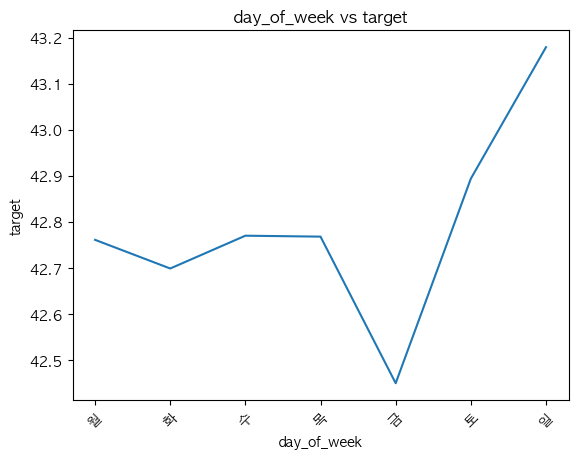

In [7]:
plt.xticks(rotation=45)
sns.lineplot(x='day_of_week',y='target',data=df_day_target).set(title='day_of_week vs target')

In [8]:
df_rating_target=groupby_target('road_rating')
df_rating_target=df_rating_target
df_rating_target

,road_rating,target
0,103,46.388468
1,106,48.021548
2,107,34.701408


[Text(0.5, 1.0, 'road_rating vs target')]

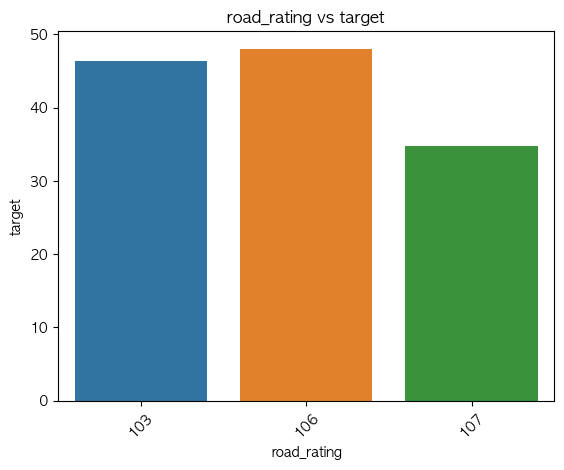

In [9]:
plt.xticks(rotation=45)
sns.barplot(x='road_rating',y='target',data=df_rating_target).set(title='road_rating vs target')

In [10]:
groupby_target('maximum_speed_limit')

,maximum_speed_limit,target
0,30.0,32.220825
1,40.0,62.774080
2,50.0,35.492231
3,60.0,42.316287
4,70.0,41.366208
5,80.0,60.703696


In [11]:
groupby_target('lane_count') 

,lane_count,target
0,1,43.570562
1,2,44.915713
2,3,34.917783


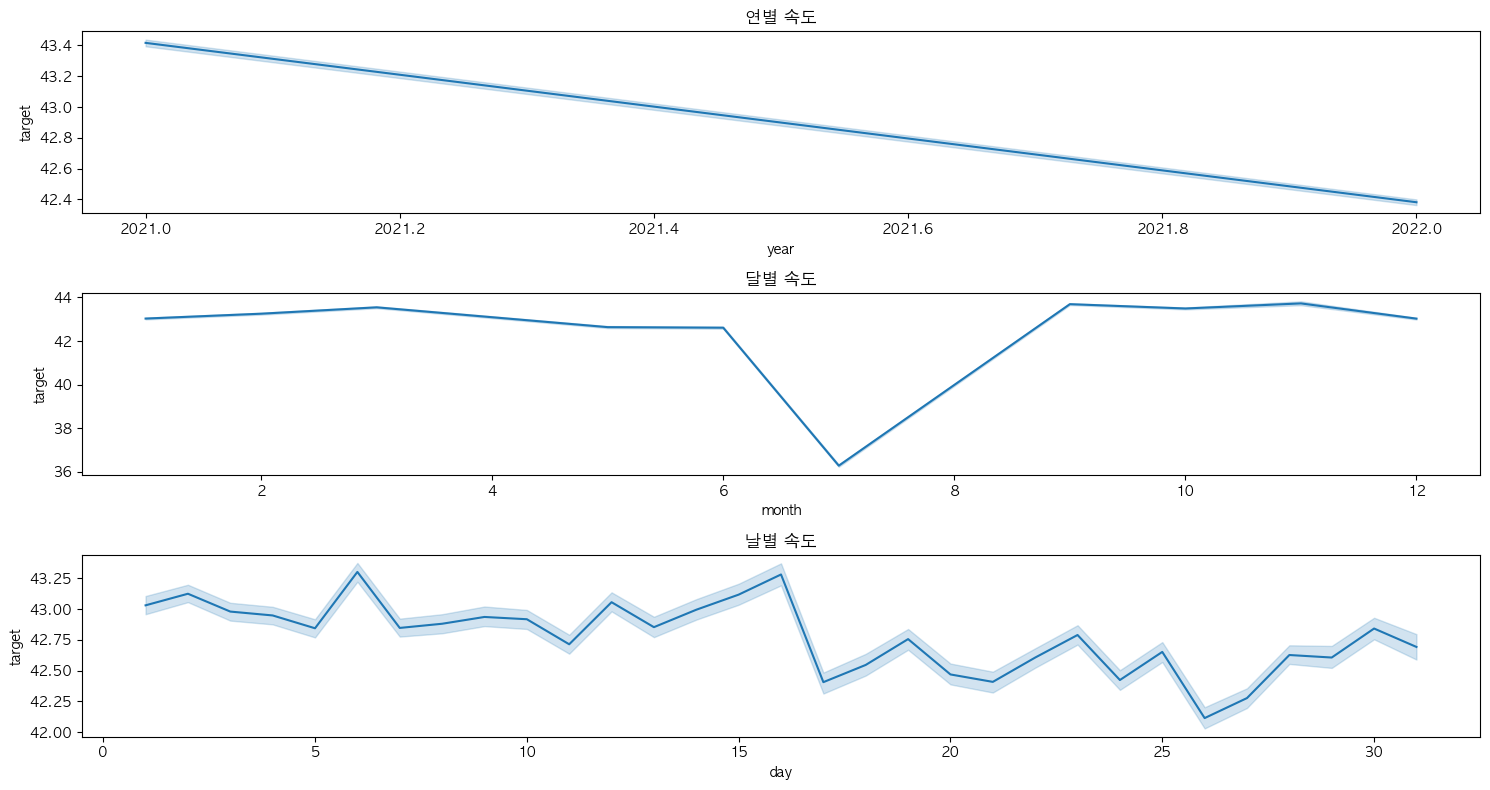

In [13]:
fig, axes = plt.subplots(3, figsize=(15,8))

sns.lineplot(x='year',y='target',data=df_train_day,ax=axes[0]).set(title='연별 속도')
sns.lineplot(x='month',y='target',data=df_train_day,ax=axes[1]).set(title='달별 속도')
sns.lineplot(x='day',y='target',data=df_train_day,ax=axes[2]).set(title='날별 속도')

plt.tight_layout()
plt.show()

[Text(0.5, 1.0, '월별')]

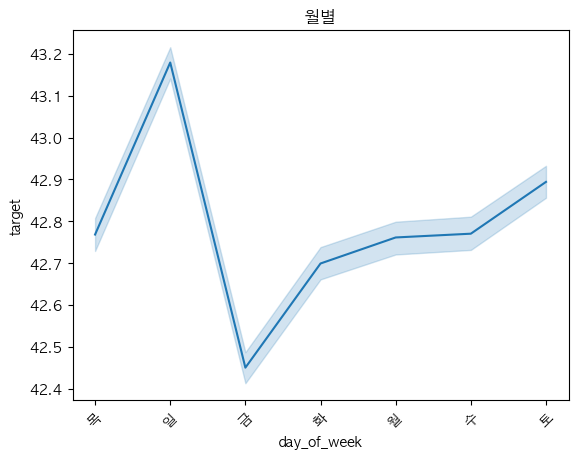

In [14]:
plt.xticks(rotation=45)
sns.lineplot(x='day_of_week',y='target',data=df_train_day).set(title='월별')

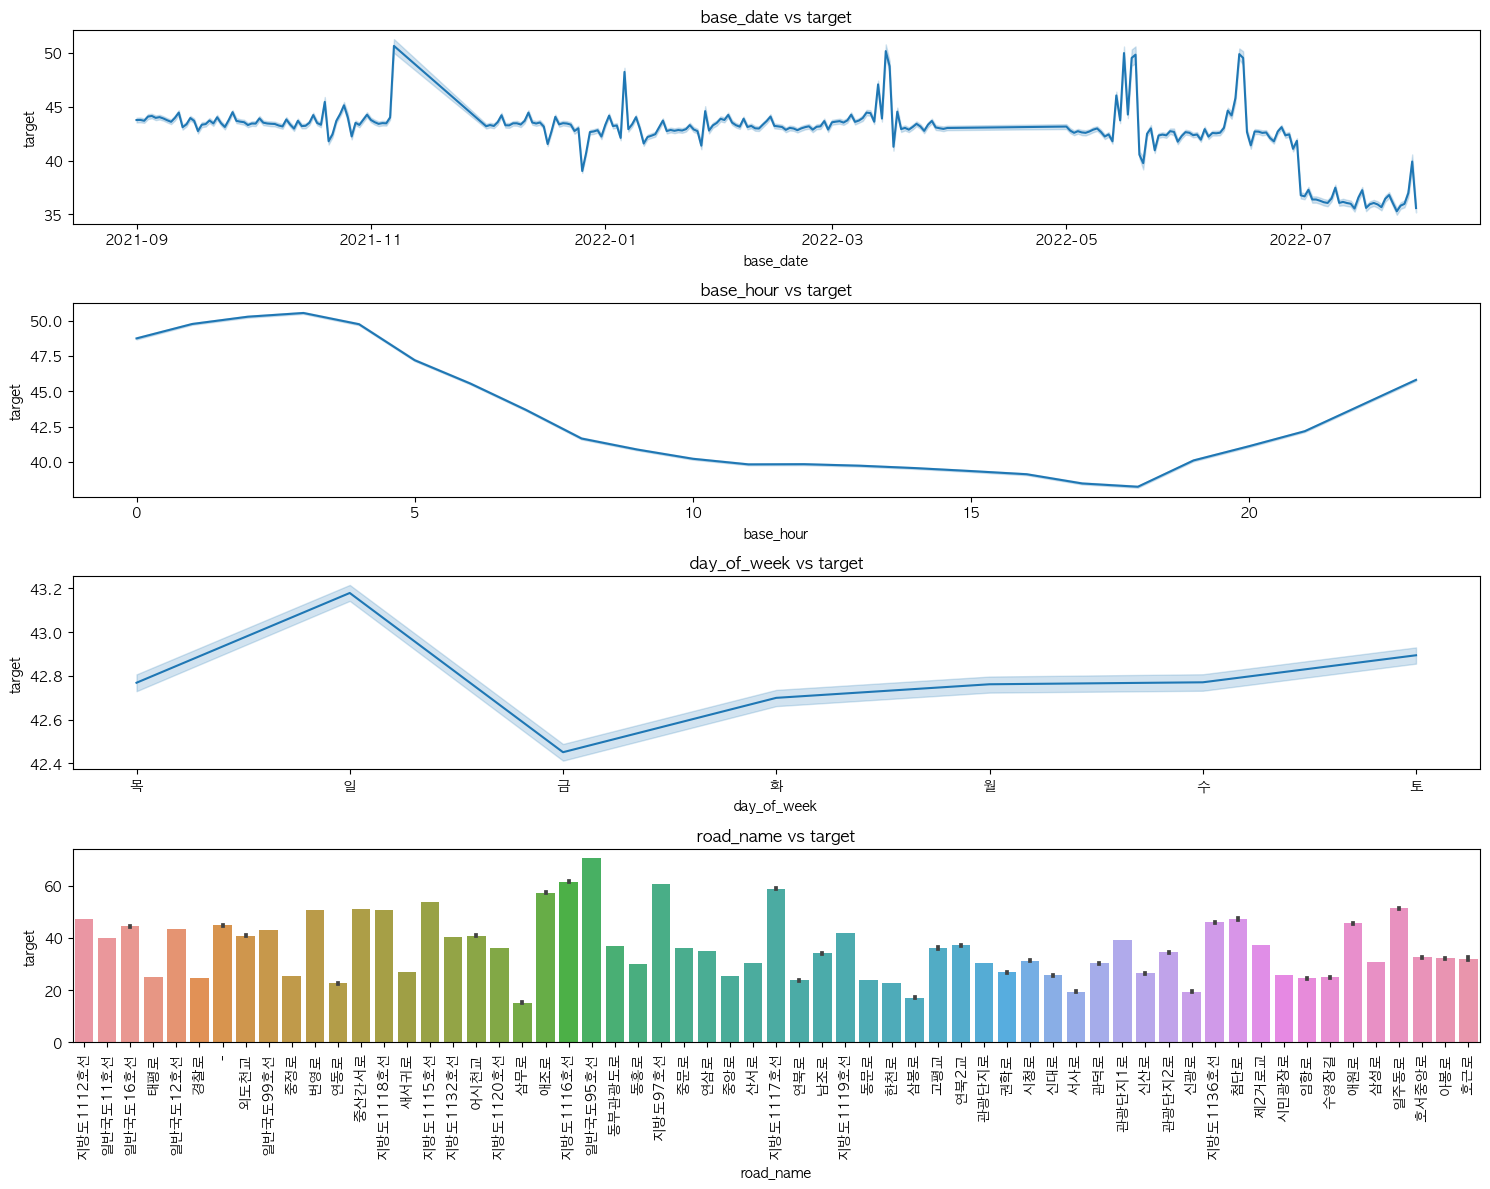

In [15]:
fig, axes = plt.subplots(4, figsize=(15,12))

sns.lineplot(x='base_date',y='target',data=df_train_day,ax=axes[0]).set(title='base_date vs target')
sns.lineplot(x='base_hour',y='target',data=df_train_day,ax=axes[1]).set(title='base_hour vs target')
sns.lineplot(x='day_of_week',y='target',data=df_train_day,ax=axes[2]).set(title='day_of_week vs target')
sns.barplot(x='road_name',y='target',data=df_train_day,ax=axes[3]).set(title='road_name vs target')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()